In [0]:
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.layers import Input, Dense

Using TensorFlow backend.


In [0]:
## Load data

from keras.datasets import mnist

In [0]:
## Input image dimensions

img_rows, img_cols = 28, 28
input_shape = (img_rows * img_cols, )

In [5]:
## The data, shuffled and split b/w train and test sets

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.shape[0], ' training samples')
print(X_test.shape[0], ' test samples')

60000  training samples
10000  test samples


In [0]:
def AE(features_shape):
  
  ## Input
  x = Input(name = 'inputs', shape = features_shape,
            dtype = 'float32')
  o = x
  
  ## Encoder
  enc = Dense(32, activation = 'relu', name = 'encoder')(o)
  
  ## Decoder
  dec = Dense(features_shape[0], activation = 'sigmoid',
              name = 'decoder')(enc)
  
  ## Print network summary
  Model(inputs = x, outputs = dec).summary()
  
  return Model(inputs = x, outputs = dec)

In [7]:
batch_size = 128
epochs = 40

autoencoder = AE(input_shape)

autoencoder.compile(optimizer = 'adadelta',
                    loss = 'binary_crossentropy')

autoencoder.fit(X_train, X_train,
                epochs = epochs,
                batch_size = batch_size,
                shuffle = True,
                validation_data = (X_test, X_test))

W0810 21:39:28.436095 140573784262528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 21:39:28.466198 140573784262528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 21:39:28.500042 140573784262528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 21:39:28.508596 140573784262528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0810 21:39:28.526691 140573784262528 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784)               0         
_________________________________________________________________
encoder (Dense)              (None, 32)                25120     
_________________________________________________________________
decoder (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


W0810 21:39:28.763382 140573784262528 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 3s 54us/step - loss: 0.3141 - val_loss: 0.2541
Epoch 2/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.2309 - val_loss: 0.2091
Epoch 3/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1985 - val_loss: 0.1871
Epoch 4/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1815 - val_loss: 0.1735
Epoch 5/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1699 - val_loss: 0.1633
Epoch 6/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1606 - val_loss: 0.1550
Epoch 7/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1531 - val_loss: 0.1482
Epoch 8/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1469 - val_loss: 0.1425
Epoch 9/40
60000/60000 [==============================] - 2s 38us/step - loss: 0.1415 - val_loss: 0.1375
Epoch

In [0]:
decoded_imgs = autoencoder.predict(X_test)

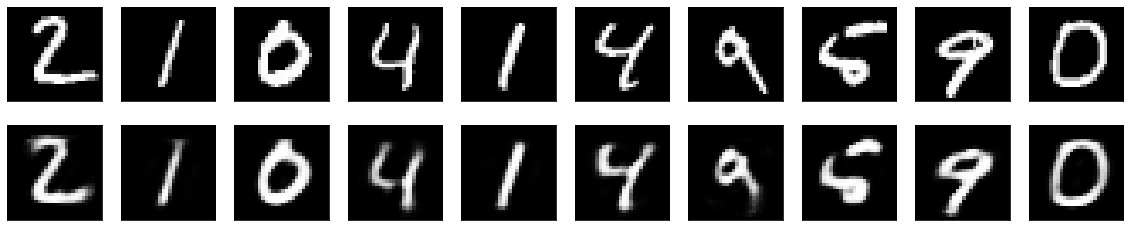

In [9]:
n = 10
plt.figure(figsize = (20, 4))

for i in range(1, n + 1):
  ## Display original images
  ax = plt.subplot(2, n, i)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ## Display reconstructed images
  ax = plt.subplot(2, n, i + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()